# 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\alllh\Documents\대학\공모전-신.빅.해\data_038_1.csv"

df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of        P1     P2  P3  P4  P5  P6   P7  B1  B2  B3  ...  B165  B166      B167  \
0       M  20대_후   1   1   0   0  A은행   0   0   0  ...     0     0   4350000   
1       M  50대_후   1   0   0   0  A은행   0   0   0  ...     0     0    580000   
2       M  40대_후   1   1   0   0  A은행   0   0   0  ...     0     0   1950000   
3       F  60대_초   1   1   0   0  A은행   0   0   0  ...     0     0  43000000   
4       M  30대_후   0   1   0   0  B은행   0   0   0  ...     0     0   4910000   
...    ..    ...  ..  ..  ..  ..  ...  ..  ..  ..  ...   ...   ...       ...   
473223  F  40대_초   0   1   0   1  B은행   0   0   0  ...     0     0    650000   
473224  M  20대_후   1   1   0   0  A은행   0   0   0  ...     0     0   4790000   
473225  F  40대_후   1   1   1   0  B은행   0   0   0  ...     0     0   1650000   
473226  M  60대_후   1   1   1   0  A은행   0   0   0  ...     0     0   1340000   
473227  F  50대_초   1   0   0   0  B은행   0   0   0  ...     0     0    750000   

         

# 스키마 정보 불러오기

In [4]:
from openpyxl import load_workbook

schema_path = r"C:\Users\alllh\Documents\대학\공모전-신.빅.해\schema.xlsx"

wb = load_workbook(filename=schema_path, 
                   read_only=True)
ws = wb['1. 데이터명세']

data_rows = []
for row in ws['C12':'H192']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

# Transform into dataframe
_schema = pd.DataFrame(data_rows, columns=["정보원천","정보형태","컬럼명","정보영역","항목명(국문)","항목 설명"])
_schema.head()

,정보원천,정보형태,컬럼명,정보영역,항목명(국문),항목 설명
0,내부정보,성별,P1,신청정보,성별,"M: 남자, F: 여자"
1,내부정보,코드,P2,신청정보,나이,"초반: 0 ~ 4, 후반: 5 ~ 9"
2,내부정보,코드,P3,신청정보,은행활동고객TF,신한카드 내부 그룹 Tops 정보를 활용하여 추정한 값
3,내부정보,코드,P4,신청정보,카드우수고객TF,신한카드 VIP 등급 유/무
4,내부정보,코드,P5,신청정보,금투활동고객TF,신한카드 내부 그룹 Tops 정보를 활용하여 추정한 값


# 데이터 분류

In [5]:
df_p = df.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보		
df_b = df.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보		
df_c = df.iloc[:, 174]      # 이용건수
df_e = df.iloc[:, 175:181]  # 기타정보: 21.5 ~ 22.5 이용 패턴 코드
# 패턴코드: 1~12개월 이용 패턴 (12자리)
# 해달 월 50만원 이상 사용 시 1
# 해달 월 50만원 미만 사용 시 0

In [6]:
schema_p = _schema.iloc[:7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보		
schema_b = _schema.iloc[7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보		
schema_c = _schema.iloc[174:175]  # 이용건수
schema_e = _schema.iloc[175:181]  # 기타정보: 21.5 ~ 22.5 이용 패턴 코드

In [29]:
idx_1 = np.where(df_p.iloc[:,2] == 1)[0]    # P3 = 1
idx_0 = np.where(df_p.iloc[:,2] == 0)[0]    # P3 = 0

In [ ]:
idx_f = np.where(df_p.iloc[:,0] == "F")[0]  # female
idx_m = np.where(df_p.iloc[:,0] == "M")[0]  # male

# 데이터 시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 사용금액의 합계 비교

<AxesSubplot: >

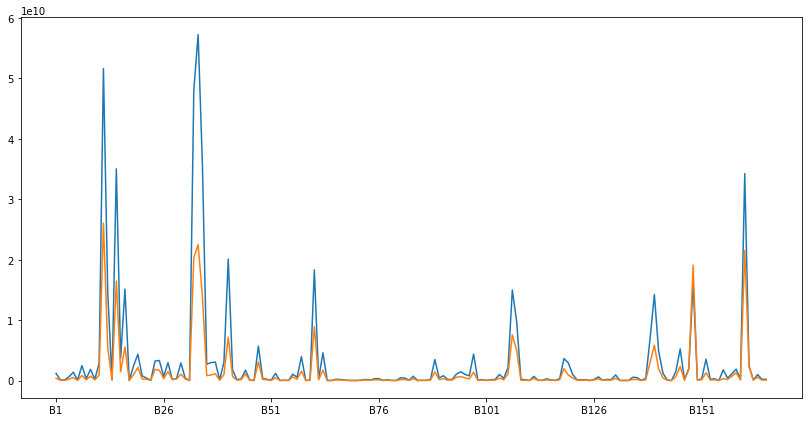

In [58]:
plt.figure(figsize=(14,7))
df_b.iloc[idx_1,:-1].sum().plot()
df_b.iloc[idx_0,:-1].sum().plot()

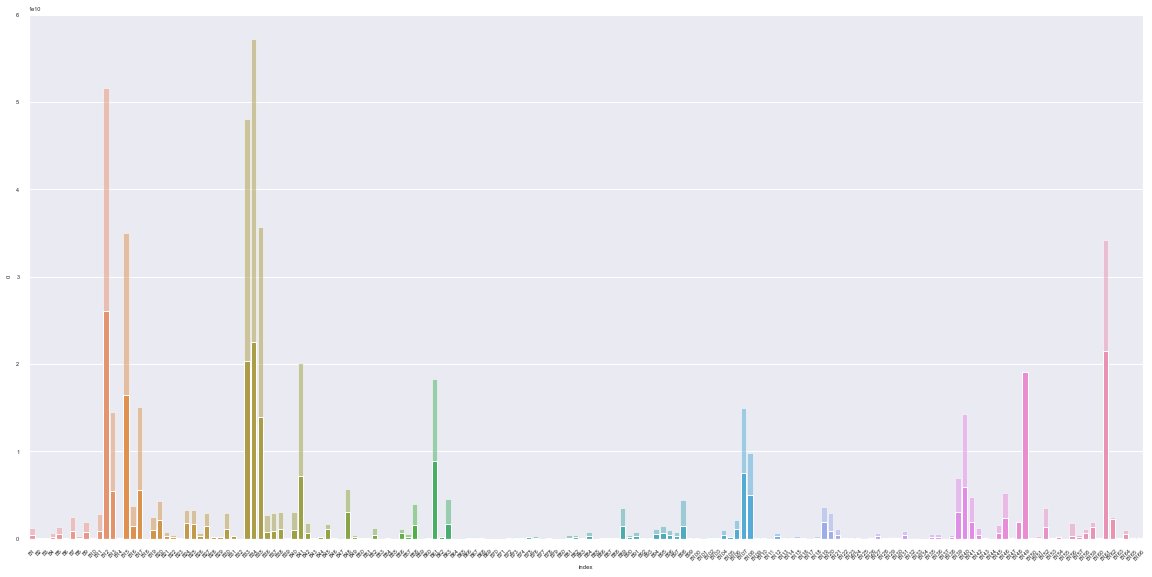

In [71]:
plt.figure(figsize=(16,8))
sns.set(font_scale=.5)  # 글자 크기 설정
sns.barplot(data=df_b.iloc[idx_1,:-1].sum().reset_index(drop=False), x='index', y=0, alpha=0.5)
sns.barplot(data=df_b.iloc[idx_0,:-1].sum().reset_index(drop=False), x='index', y=0, alpha=1)
plt.xticks(rotation=45)
plt.tight_layout()

In [50]:
df_b.iloc[idx_1,:-1].sum().info

<bound method Series.info of B1      1172092000
B2        93406000
B3        95736000
B4       628043000
B5      1369085000
           ...    
B162    2423000000
B163      71197000
B164     973367000
B165     198383000
B166     204366000
Length: 166, dtype: int64>